In [1]:
!pip install openpyxl

--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1752, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1390, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/segment.py", line 245, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1368, in render
    renderable = rich_cast(renderable)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/protocol.py", line 36

In [2]:
#讀取excel表
from openpyxl import load_workbook
import pandas as pd
df = pd.read_excel("pre-processing.xlsx", sheet_name="preprocessing")
df.head()

,Date,Rented Bike Count,Hour,Temperature(Celsius),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(Celsius),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,1,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,0,1
1,1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,0,1
2,1,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,0,1
3,1,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,0,1
4,1,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,0,1


In [3]:
#處理需要正規化資料
from sklearn.preprocessing import MinMaxScaler
df_scaler = pd.read_excel("pre-processing.xlsx", sheet_name="preprocessing", 
                   usecols="B, D:J")
#設定縮放的區間上下限
minmax = MinMaxScaler( feature_range=(0,1) )
minmaxdf = minmax.fit_transform(df_scaler)
minmaxdf = pd.DataFrame(minmaxdf)

minmaxdf.columns = ['Rented','Temperature', 'Humidity', 'Wind speed', 'Visibility', 'Dew point temperature', 'Solar Radiation','Rainfall']
minmaxdf.head()

,Rented,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall
0,0.071429,0.220280,0.377551,0.297297,1.0,0.224913,0.0,0.0
1,0.057368,0.215035,0.387755,0.108108,1.0,0.224913,0.0,0.0
2,0.048650,0.206294,0.397959,0.135135,1.0,0.223183,0.0,0.0
3,0.030090,0.202797,0.408163,0.121622,1.0,0.224913,0.0,0.0
4,0.021935,0.206294,0.367347,0.310811,1.0,0.207612,0.0,0.0


In [4]:
#匯入不需正規化資料 #排除降雪量
df_unscaler = pd.read_excel("pre-processing.xlsx", sheet_name="preprocessing", 
                   usecols="A, C, L:N")  
#合併正規化資料與原資料
df = pd.concat([df_unscaler, minmaxdf], axis=1)
df

,Date,Hour,Seasons,Holiday,Functioning Day,Rented,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall
0,1,0,3,0,1,0.071429,0.220280,0.377551,0.297297,1.000000,0.224913,0.0,0.0
1,1,1,3,0,1,0.057368,0.215035,0.387755,0.108108,1.000000,0.224913,0.0,0.0
2,1,2,3,0,1,0.048650,0.206294,0.397959,0.135135,1.000000,0.223183,0.0,0.0
3,1,3,3,0,1,0.030090,0.202797,0.408163,0.121622,1.000000,0.224913,0.0,0.0
4,1,4,3,0,1,0.021935,0.206294,0.367347,0.310811,1.000000,0.207612,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,365,19,2,0,1,0.282058,0.384615,0.346939,0.351351,0.946275,0.351211,0.0,0.0
8756,365,20,2,0,1,0.214848,0.370629,0.377551,0.310811,1.000000,0.358131,0.0,0.0
8757,365,21,2,0,1,0.195163,0.356643,0.397959,0.040541,0.983781,0.358131,0.0,0.0
8758,365,22,2,0,1,0.200225,0.347902,0.418367,0.135135,0.928535,0.359862,0.0,0.0


In [5]:
x = df.drop(['Rented'],axis=1)
x

,Date,Hour,Seasons,Holiday,Functioning Day,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall
0,1,0,3,0,1,0.220280,0.377551,0.297297,1.000000,0.224913,0.0,0.0
1,1,1,3,0,1,0.215035,0.387755,0.108108,1.000000,0.224913,0.0,0.0
2,1,2,3,0,1,0.206294,0.397959,0.135135,1.000000,0.223183,0.0,0.0
3,1,3,3,0,1,0.202797,0.408163,0.121622,1.000000,0.224913,0.0,0.0
4,1,4,3,0,1,0.206294,0.367347,0.310811,1.000000,0.207612,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,365,19,2,0,1,0.384615,0.346939,0.351351,0.946275,0.351211,0.0,0.0
8756,365,20,2,0,1,0.370629,0.377551,0.310811,1.000000,0.358131,0.0,0.0
8757,365,21,2,0,1,0.356643,0.397959,0.040541,0.983781,0.358131,0.0,0.0
8758,365,22,2,0,1,0.347902,0.418367,0.135135,0.928535,0.359862,0.0,0.0


In [6]:
y = df['Rented'].values
y

array([0.07142857, 0.05736783, 0.04865017, ..., 0.1951631 , 0.20022497,
       0.16422947])

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [8]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=1)
model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [9]:
res_text = model.predict(X_test)
res_text

array([0.12457818, 0.63835771, 0.2272216 , ..., 0.15635546, 0.3352081 ,
       0.12035996])

In [10]:
model.score(X_train,y_train)

1.0

In [11]:
model.score(X_test,y_test)

0.7983801528621945

In [12]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, res_text)
MAE

0.04972767744785327

In [13]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_test, res_text, squared=False)
RMSE

0.08117693366690473

In [14]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, res_text)
MAPE

2338504475448.6055

In [15]:
import numpy as np
import matplotlib.pyplot as plt
def get_score_after_permutation(model, X, y, curr_feat):
    """ return the score of model when curr_feat is permuted """

    X_permuted = X.copy()
    col_idx = list(X.columns).index(curr_feat)
    # permute one column
    X_permuted.iloc[:, col_idx] = np.random.permutation(
        X_permuted[curr_feat].values)

    permuted_score = model.score(X_permuted, y)
    return permuted_score

def get_feature_importance(model, X, y, curr_feat):
    """ compare the score when curr_feat is permuted """

    baseline_score_train = model.score(X, y)
    permuted_score_train = get_score_after_permutation(model, X, y, curr_feat)

    # feature importance is the difference between the two scores
    feature_importance = baseline_score_train - permuted_score_train
    return feature_importance

In [16]:
def permutation_importance(model, X, y, n_repeats=10):
    """Calculate importance score for each feature."""

    importances = []
    for curr_feat in X.columns:
        list_feature_importance = []
        for n_round in range(n_repeats):
            list_feature_importance.append(
                get_feature_importance(model, X, y, curr_feat))

        importances.append(list_feature_importance)

    return {'importances_mean': np.mean(importances, axis=1),
            'importances_std': np.std(importances, axis=1),
            'importances': importances}

In [17]:
def plot_feature_importances(perm_importance_result, feat_name):
    """ bar plot the feature importance """

    fig, ax = plt.subplots()

    indices = perm_importance_result['importances_mean'].argsort()
    plt.barh(range(len(indices)),
             perm_importance_result['importances_mean'][indices],
             xerr=perm_importance_result['importances_std'][indices])

    ax.set_yticks(range(len(indices)))
    _ = ax.set_yticklabels(feat_name[indices])

Text(0, 0.5, 'attribute')

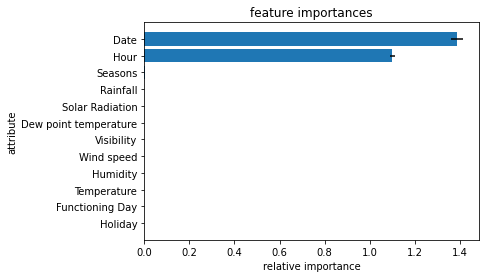

In [20]:
perm_importance_result_train = permutation_importance(model, X_train, y_train, n_repeats=10)
plot_feature_importances(perm_importance_result_train, X_train.columns)
plt.title('feature importances')
plt.xlabel('relative importance')
plt.ylabel('attribute')